# Index:
* [1-Introduction](#first-section)
* [2-Data preparation](#second-section)
* [3-Audience Analysis](#third-section)
* [4-Instrument Analysis](#fourth-section)
* [5-First Bullet Header](#fifth-section)
* [6-Second Bullet Header](#sixth-section)

# 1 - Introduction <a class="anchor" id="first-section"></a>
The dataset analyzed in this work regards a survey on mandolins bla bla bla...


In [374]:
import pandas as pd
csv_path = '../data/part2_109.csv'
data = pd.read_csv(csv_path)
data.head(2)

,Timestamp,Seleziona la lingua in cui preferisci rispondere al questionario. // Please select the language you are most confortable with to answer the survey.,Sei un musicista?,"Se sì, quale è il tuo percorso di studi?",Sei un mandolinista o suoni strumenti a pizzico?,In una scala da 1 a 6 definiresti il suono del mandolino ascoltato più...,In una scala da 1 a 6 definiresti il suono del mandolino ascoltato più....1,In una scala da 1 a 6 definiresti il suono del mandolino ascoltato più....2,In una scala da 1 a 6 definiresti il suono del mandolino ascoltato più....3,In una scala da 1 a 6 definiresti il suono del mandolino ascoltato più....4,...,"Which of the two mandolins has a sound that is more... [Higher ""sustain"" (longer notes)].1",In general you prefer the sound of....1,Which of the two mandolins has a sound that is more... [Brilliant].2,Which of the two mandolins has a sound that is more... [Round].2,Which of the two mandolins has a sound that is more... [Warm].2,Which of the two mandolins has a sound that is more... [Soft].2,"Which of the two mandolins has a sound that is more... [Higher ""sustain"" (longer notes)].2",In general you prefer the sound of....2,"If you have any comments, observations or suggestions, please indicate them below.",Email Address
0,12/7/2021 13:08:50,Italiano,Sì,Diplomato in conservatorio / Professionista,Sì,5.0,2.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/7/2021 13:11:16,Italiano,Sì,Attualmente studente,Sì,4.0,3.0,3.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2 - Data Preparation <a class="anchor" id="second-section"></a>

#### Remove useless columns

In [375]:
data = data.drop(['Timestamp', 'Email Address'], axis=1)

#### Copy all italian responses in the english columns and vice versa

In [376]:
import numpy as np
for idx, language in data.iloc[:, 0].items():
    if language == 'Italiano':
        data.iloc[idx, 63:125] = np.array(data.iloc[idx, 1:63])
    else:
        data.iloc[idx, 1:63] = np.array(data.iloc[idx, 63:125])

#### Remove all the italian columns and keep only the english ones

In [377]:
data.drop(data.columns[1:63], axis=1, inplace=True)

#### Shortify answers

In [378]:
data.loc[data[data.columns[2]] == "Conservatory graduate / Professional player", data.columns[2]] = "Graduate/Professionist"
data.loc[data[data.columns[2]] == 'Self-taught / amateur',data.columns[2]] = "Amateur"
data.loc[data[data.columns[2]] == 'I took a few lessons in the past',data.columns[2]] = "Few lessons"

#### Make all the answers in english (easier!)

In [379]:
data.loc[data[data.columns[0]] == 'Italiano', data.columns[0]] = "Italian"
data.loc[data[data.columns[1]] == 'Sì', data.columns[1]] = 'Yes'
data.loc[data[data.columns[2]] == 'Autodidatta / dilettante', data.columns[2]]  = "Amateur"
data.loc[data[data.columns[2]] == 'Ho preso qualche lezione in passato', data.columns[2]]  = "Few lessons"
data.loc[data[data.columns[2]] == 'Attualmente studente', data.columns[2]]  = "Currently student"
data.loc[data[data.columns[2]] == 'Diplomato in conservatorio / Professionista', data.columns[2]]  = "Graduate/Professionist"
data.loc[data[data.columns[3]] == 'Sì', data.columns[3]] = 'Yes'
columns = range(44, 62)
for col in columns:
    data.loc[data[data.columns[col]] == 'Mandolino 1', data.columns[col]] = 'Mandolin 1'
    data.loc[data[data.columns[col]] == 'Mandolino 2', data.columns[col]] = 'Mandolin 2'
    data.loc[data[data.columns[col]] == 'Non saprei', data.columns[col]] = 'I don\'t know'
    data.loc[data[data.columns[col]] == 'Non saprei / Sono molto simili', data.columns[col]] = 'I don\'t know'
data = data.rename(columns={data.columns[0]: 'Language'})

#### Make all the answers in english

In [380]:
columns = [0]
for col in columns:
    for idx, answer in data.iloc[:, col].items():
        if answer == 'Italiano':
            data.iloc[idx, col] = 'Italian'   
columns = [2]
for col in columns:
    for idx, answer in data.iloc[:, col].items():
        if answer == 'Autodidatta / dilettante':
            data.iloc[idx, col] = 'Self-taught / amateur'
        elif answer == 'Ho preso qualche lezione in passato':
            data.iloc[idx, col] = 'I took a few lessons in the past'
        elif answer == 'Attualmente studente':
            data.iloc[idx, col] = 'Currently student'
        elif answer == 'Diplomato in conservatorio / Professionista':
            data.iloc[idx, col] = 'Conservatory graduate / Professional player'
            
columns = [1, 3]
for col in columns:
    for idx, answer in data.iloc[:, col].items():
        if answer == 'Sì':
            data.iloc[idx, col] = 'Yes'

columns = range(44, 62)
for col in columns:
    for idx, answer in data.iloc[:, col].items():
        if answer == 'Mandolino 1':
            data.iloc[idx, col] = 'Mandolin 1'
        elif answer == 'Mandolino 2':
            data.iloc[idx, col] = 'Mandolin 2'
        elif answer == 'Non saprei':
            data.iloc[idx, col] = 'I don\'t know'
        elif answer == 'Non saprei / Sono molto simili':
            # data.iloc[idx, col] = 'I don\'t know / They are very similar'
            data.iloc[idx, col] = 'I don\'t know'
            
data = data.rename(columns={data.columns[0]: 'Language'})

#### Show modified data

In [381]:
data.head(2)

,Language,Are you a musician?,"If yes, what is your study path?",Are you a mandolin player or do you play plucked instruments?,On a scale of 1 to 6 you would define this mandolin sound more...,On a scale of 1 to 6 you would define this mandolin sound more....1,On a scale of 1 to 6 you would define this mandolin sound more....2,On a scale of 1 to 6 you would define this mandolin sound more....3,On a scale of 1 to 6 you would define this mandolin sound more....4,On a scale of 1 to 6 you would define this mandolin sound more....5,...,Which of the two mandolins has a sound that is more... [Soft].1,"Which of the two mandolins has a sound that is more... [Higher ""sustain"" (longer notes)].1",In general you prefer the sound of....1,Which of the two mandolins has a sound that is more... [Brilliant].2,Which of the two mandolins has a sound that is more... [Round].2,Which of the two mandolins has a sound that is more... [Warm].2,Which of the two mandolins has a sound that is more... [Soft].2,"Which of the two mandolins has a sound that is more... [Higher ""sustain"" (longer notes)].2",In general you prefer the sound of....2,"If you have any comments, observations or suggestions, please indicate them below."
0,Italian,Yes,Graduate/Professionist,Yes,5.0,2.0,4.0,2.0,4.0,4.0,...,Mandolin 1,Mandolin 1,Mandolin 2,Mandolin 1,I don't know,Mandolin 2,Mandolin 1,Mandolin 1,Mandolin 1,NaN
1,Italian,Yes,Currently student,Yes,4.0,3.0,3.0,3.0,4.0,4.0,...,I don't know,I don't know,I don't know,Mandolin 2,Mandolin 1,Mandolin 2,Mandolin 1,Mandolin 2,Mandolin 2,NaN


# 3 - Audience Analysis <a class="anchor" id="third-section"></a>
#### Let's have a first analysis on the audience responding to the survey

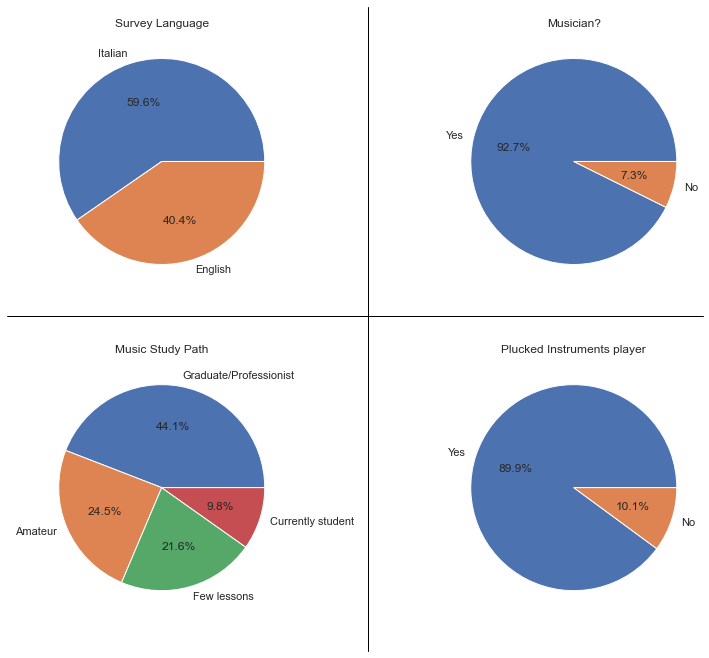

In [395]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2,figsize=(12,12))
titles = ['Survey Language','Musician?','Music Study Path','Plucked Instruments player']
for i in range(4):
    labels = list(data.iloc[:, i].value_counts().index.values)
    axes[int(i/2)][i%2].pie(data.iloc[:, i].value_counts(), autopct='%.1f%%',labels = labels)
    axes[int(i/2)][i%2].set_title(titles[i])
    #axes[int(i/2)][i%2].legend(data.iloc[:, i].value_counts().index.values)
#axes[1,0].legend(data.iloc[:, 2].value_counts().index.values,bbox_to_anchor=(1.5,0.2))
plt.subplots_adjust(hspace=0,wspace=0.6)
plt.plot([1.3,1.3], [1.1,-1.4], color='black', lw=1, transform=axes[0][0].transAxes, clip_on=False) #vertical line
plt.plot([-0.1,2.6],[-0.1,-0.1], color='black', lw=1,transform=axes[0][0].transAxes, clip_on=False) #orizontal line
plt.show()

#### Square plot with audience music level

[0.07339449541284404, 0.4087965461413923, 0.2271091923007735, 0.19985608922468068, 0.09084367692030941]


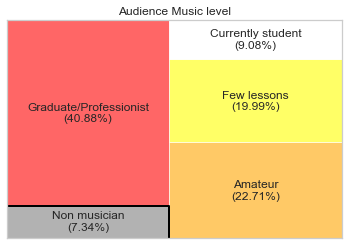

In [410]:
import squarify # pip install squarify
sizes = []
musicians = list(data.iloc[:, 1].value_counts())
sizes.append(musicians[1] / sum(musicians)) #first size is non musicians
study_path = list(data.iloc[:, 2].value_counts())
for s in study_path:
    sizes.append( (1-sizes[0]) * s/sum(study_path))
print(sizes)
colors = ["grey","red","orange","yellow","white"]
labels = ["Non musician"] + list(data.iloc[:, 2].value_counts().index.values)
for i in range(len(labels)):
    labels[i] = labels[i]+"\n("+str(round(sizes[i]*100,2))+"%)"
squarify.plot(sizes, label=labels, alpha=0.6,color=colors)
plt.plot([0,100*(sizes[0]+sizes[1]),100*(sizes[0]+sizes[1])],[200*sizes[0],200*sizes[0],0],color='black', lw=2)
plt.title("Audience Music level")
plt.yticks([],[])
plt.xticks([],[])
plt.show()

#### Let's check the standard deviation of the users, to discard people always giving the same value

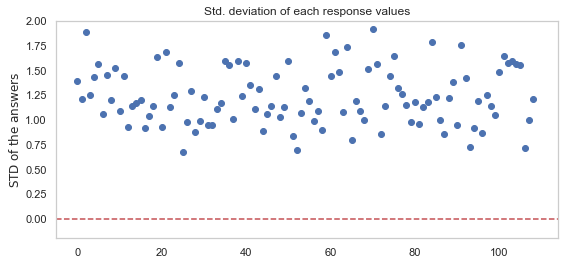

In [422]:
std_min = 0
data_part = data.iloc[:, 4:43]
# mean_val = np.mean(data2, axis=1)
std_val = np.std(data_part, axis=1)
#if std_min:
#    data = data.loc[std_val > std_min, :]

plt.figure(figsize=(9,4))
plt.scatter(range(len(std_val)),std_val)

plt.hlines(std_min, -5, len(std_val)+5, colors='r', linestyles='dashed')
    
minor_val = [(x,y) for x,y in enumerate(std_val) if y < std_min]
if len(minor_val) > 0:
    xmin,ymin = zip(*minor_val)
    plt.scatter(xmin,ymin,marker="x",color='r',s=30)

plt.xlim([-5, len(std_val)+5])
plt.ylim((-0.2,2))
plt.ylabel(r'$\mathrm{STD\;of\;the\;answers}$')
plt.grid()
plt.title("Std. deviation of each response values")
plt.show()

In [403]:
#discard values with std < std_min
if std_min:
    data_part = data.iloc[:,4:43]
    # mean_val = np.mean(data2, axis=1)
    std_val = np.std(data_part, axis=1)
    data = data.loc[std_val > std_min,:]

# 4 - Instruments Analysis <a class="anchor" id="fourth-section"></a>
#### First we define a function to analyse single instruments

In [484]:
import seaborn as sns
def plot_single_instrument_boxplot(data, start, end, title):

    font_size = 12

    # labels_top = [r'$\mathrm{Dull}$',r'$\mathrm{Cold}$',r'$\mathrm{Opaque}$',r'$\mathrm{Sharp}$',
    #               r'$\mathrm{Homog.}$',r'$\mathrm{Closed}$',r'$\mathrm{Sustain}$']
    # labels_bottom = [r'$\mathrm{Clear}$',r'$\mathrm{Warm}$',r'$\mathrm{Brilliant}$',r'$\mathrm{Round}$',
    #                  r'$\mathrm{Ringing}$',r'$\mathrm{Open}$',r'$\mathrm{Sustain}$']
    labels_top = [r'$\mathrm{Dull}$',r'$\mathrm{Cold}$',r'$\mathrm{Opaque}$',r'$\mathrm{Sharp}$',
                  r'$\mathrm{Homog.}$',r'$\mathrm{Closed}$']
    labels_bottom = [r'$\mathrm{Clear}$',r'$\mathrm{Warm}$',r'$\mathrm{Brilliant}$',r'$\mathrm{Round}$',
                     r'$\mathrm{Ringing}$',r'$\mathrm{Open}$']
    labels_comparison = [r'$\mathrm{WWDF2}$',r'$\mathrm{WWDF1}$',r'$\mathrm{WWDF3}$',r'$\mathrm{CA-STD}$',
                     r'$\mathrm{Pandini}$']

    #sns.set_theme(style="whitegrid")
    if end:
        ax = sns.boxplot(data=data.iloc[:, start:end])
        # ax = sns.violinplot(data=data.iloc[:, start:end])
        ax.set_xticks(np.arange(len(labels_bottom)))
        ax.set_xticklabels(labels_bottom, fontdict={'fontsize': font_size})

        secax = ax.secondary_xaxis('top', functions=None)
        secax.set_xticks(np.arange(len(labels_top)))
        secax.set_xticklabels(labels_top, fontdict={'fontsize': font_size})
    else:
        ax = sns.boxplot(data=data.iloc[:, start])
        # ax = sns.violinplot(data=data.iloc[:, start])
        ax.set_xticks(np.arange(len(labels_comparison)))
        ax.set_xticklabels(labels_comparison, fontdict={'fontsize': font_size})

    ax.set_title('$\mathrm{' + title.replace(" ", "\;") + '}$', fontsize= font_size+2, y=1.13)

    return ax

#### Then we call the function for each instrument and for an overall comparison

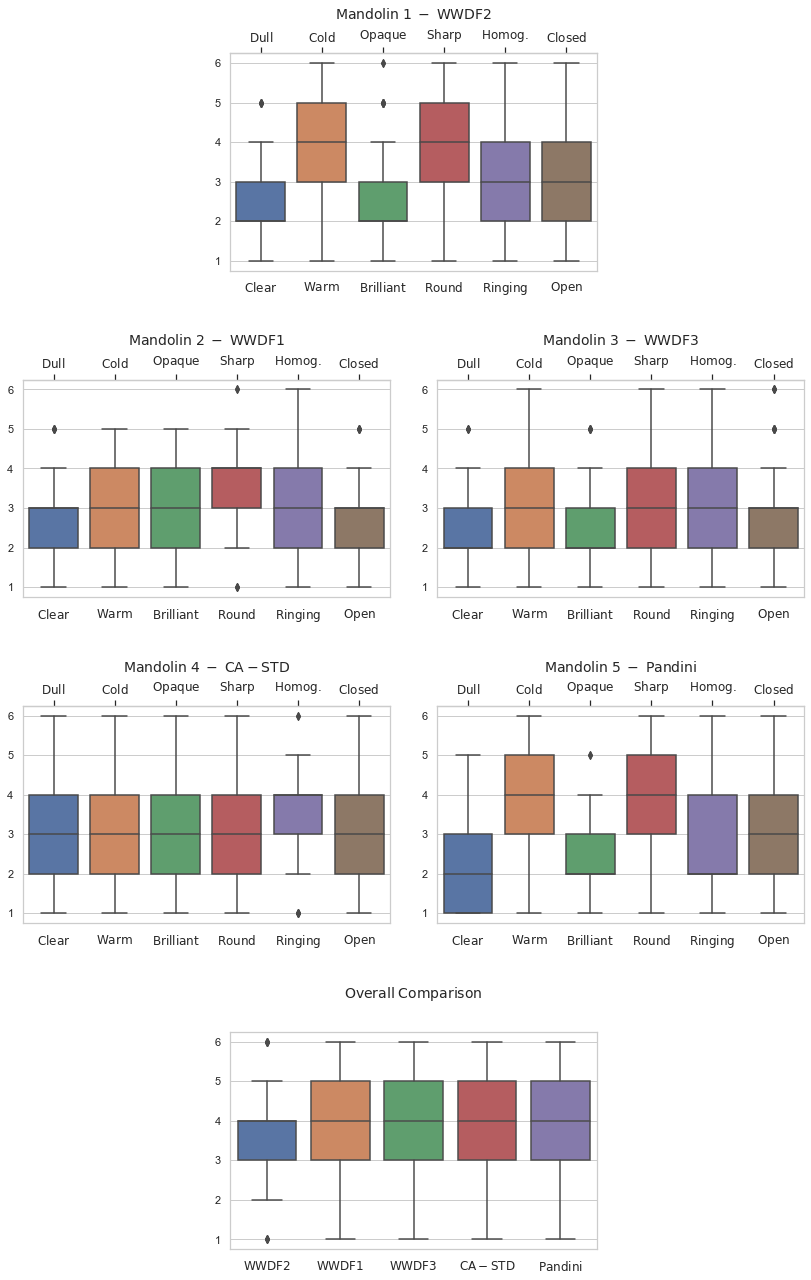

In [485]:
#fig, axes = plt.subplots(8,8,figsize=(15,30))
plt.figure(figsize=(14,22))
grid = plt.GridSpec(4,4, wspace=0.3, hspace=0.5)

plt.subplot(grid[0:1,1:3])
plot_single_instrument_boxplot(data, 4, 10, 'Mandolin 1 - WWDF2')

plt.subplot(grid[1:2, 0:2])
plot_single_instrument_boxplot(data, 12, 18, 'Mandolin 2 - WWDF1')

plt.subplot(grid[1:2, 2:4])
plot_single_instrument_boxplot(data, 20, 26, 'Mandolin 3 - WWDF3')

plt.subplot(grid[2:3, 0:2])
plot_single_instrument_boxplot(data, 28, 34, 'Mandolin 4 - CA-STD')

plt.subplot(grid[2:3, 2:4])
plot_single_instrument_boxplot(data, 36, 42, 'Mandolin 5 - Pandini')

plt.subplot(grid[3:4,1:3])
plot_single_instrument_boxplot(data, [11, 19, 27, 35, 43], None, 'Overall Comparison')
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

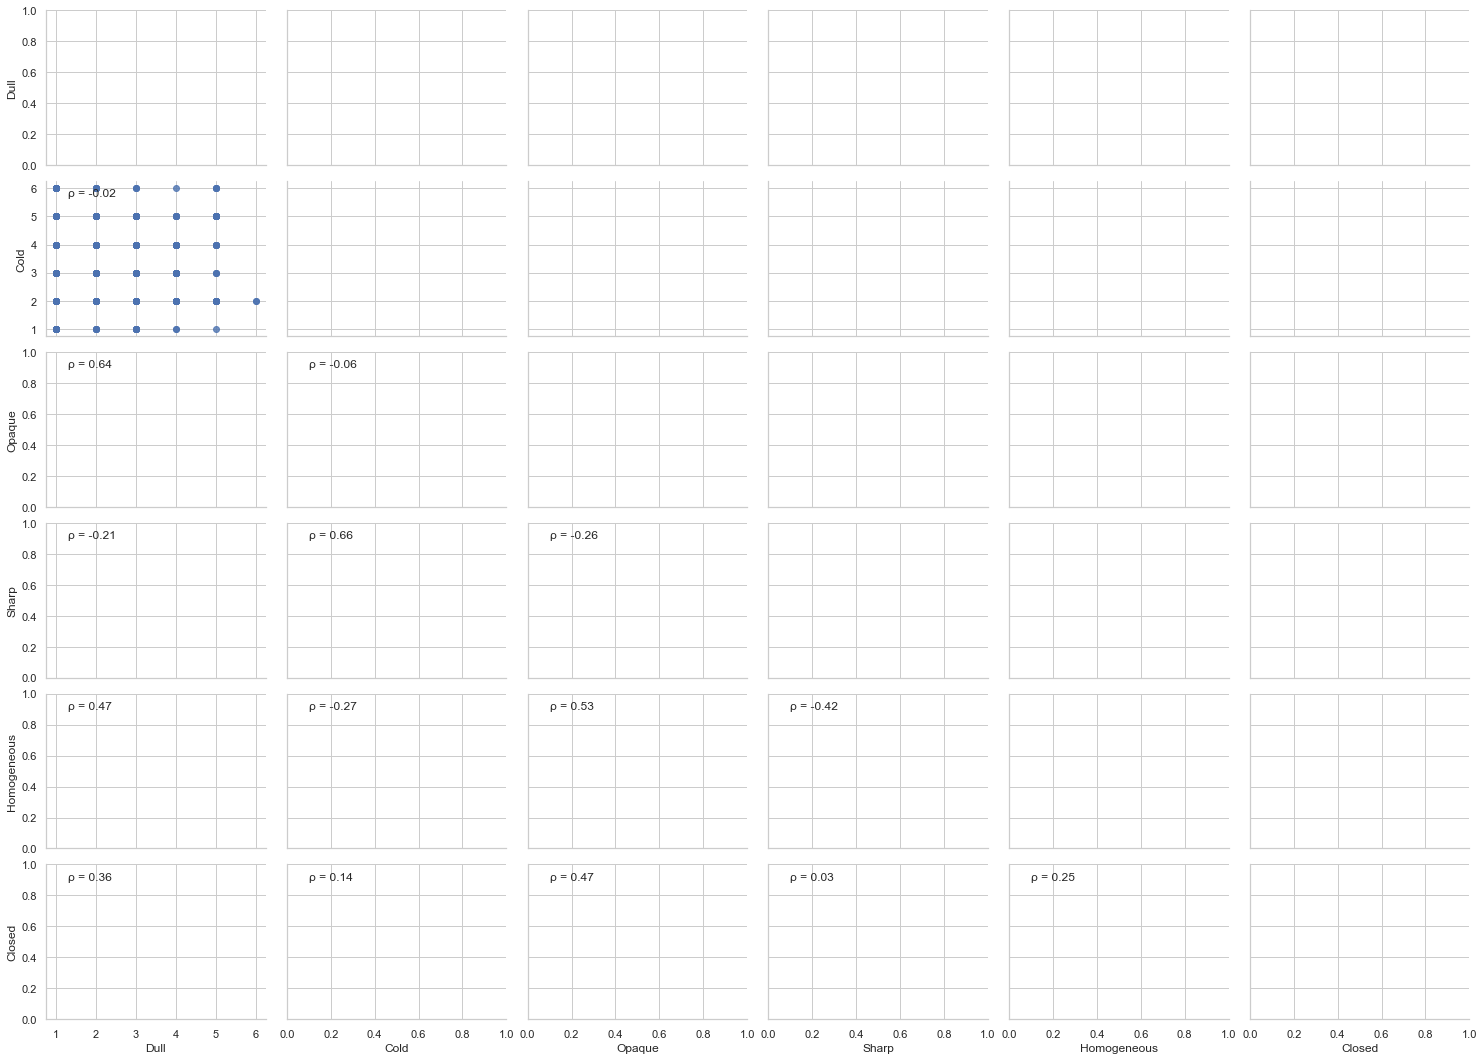

In [488]:
mand1 = data.iloc[:, 4:10]
mand2 = data.iloc[:, 12:18]
mand3 = data.iloc[:, 20:26]
mand4 = data.iloc[:, 28:34]
mand5 = data.iloc[:, 36:42]

mand1.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]
mand2.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]
mand3.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]
mand4.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]
mand5.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]

features = pd.concat([mand1, mand2, mand3, mand4, mand5])

from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

def corrdot(*args, **kwargs):
    return
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5, ], xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

    # g = sns.pairplot(stocks,palette=["Blues_d"])

g = sns.PairGrid(features, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black', 'linewidth': 1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black', 'linewidth': 1})
g.map_upper(corrdot)
plt.show()

In [14]:
def instrument_fingerprint(data):

    mand1 = np.mean(data.iloc[:, 4:10], axis=0).to_list()
    mand2 = np.mean(data.iloc[:, 12:18], axis=0).to_list()
    mand3 = np.mean(data.iloc[:, 20:26], axis=0).to_list()
    mand4 = np.mean(data.iloc[:, 28:34], axis=0).to_list()
    mand5 = np.mean(data.iloc[:, 36:42], axis=0).to_list()

    mand1.append(mand1[0])
    mand2.append(mand2[0])
    mand3.append(mand3[0])
    mand4.append(mand4[0])
    mand5.append(mand5[0])

    adjectives = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]

    plt.figure(figsize=(10, 6))
    plt.subplot(polar=True)

    theta = np.linspace(0, 2 * np.pi, len(mand1))

    lines, labels = plt.thetagrids(range(0, 360, int(360 / len(adjectives))), (adjectives))
    plt.plot(theta, mand1)
    # plt.fill(theta, actual, 'b', alpha=0.1)
    plt.plot(theta, mand2)
    plt.plot(theta, mand3)
    plt.plot(theta, mand4)
    plt.plot(theta, mand5)

    plt.legend(labels=('Mand1', 'Mand2', 'Mand3', 'Mand4', 'Mand5'), loc=1)
    # plt.title("")
    plt.show()

    # ===============================================

    mand1 = np.mean(data.iloc[:, 4:10], axis=0).to_list()
    mand2 = np.mean(data.iloc[:, 12:18], axis=0).to_list()
    mand3 = np.mean(data.iloc[:, 20:26], axis=0).to_list()
    mand4 = np.mean(data.iloc[:, 28:34], axis=0).to_list()
    mand5 = np.mean(data.iloc[:, 36:42], axis=0).to_list()

    adj0 = [mand1[0], mand2[0], mand3[0], mand4[0], mand5[0]]
    adj1 = [mand1[1], mand2[1], mand3[1], mand4[1], mand5[1]]
    adj2 = [mand1[2], mand2[2], mand3[2], mand4[2], mand5[2]]
    adj3 = [mand1[3], mand2[3], mand3[3], mand4[3], mand5[3]]
    adj4 = [mand1[4], mand2[4], mand3[4], mand4[4], mand5[4]]
    adj5 = [mand1[5], mand2[5], mand3[5], mand4[5], mand5[5]]

    adj0.append(adj0[0])
    adj1.append(adj1[0])
    adj2.append(adj2[0])
    adj3.append(adj3[0])
    adj4.append(adj4[0])
    adj5.append(adj5[0])

    instruments = ["Mand1", "Mand2", "Mand3", "Mand4", "Mand5"]

    plt.figure(figsize=(10, 6))
    plt.subplot(polar=True)

    theta = np.linspace(0, 2 * np.pi, len(mand1))

    lines, labels = plt.thetagrids(range(0, 360, int(360 / len(instruments))), (instruments))
    plt.plot(theta, adj0)
    # plt.fill(theta, actual, 'b', alpha=0.1)
    plt.plot(theta, adj1)
    plt.plot(theta, adj2)
    plt.plot(theta, adj3)
    plt.plot(theta, adj4)
    plt.plot(theta, adj5)

    plt.legend(labels=("Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"), loc=1)
    # plt.title("")
    plt.show()
def plot_comparison(data, start, end, instrument1, instrument2, save_name):

    y_pos = [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23]

    performance = pd.Series(dtype='int64')
    for idx in range(start, end):
        responses = data.iloc[:, idx].value_counts()
        responses = responses.reindex(['Mandolin 1', 'Mandolin 2', 'I don\'t know'])
        performance = pd.concat([performance, responses])

    color_vec = ('#2e5cb7', '#c63310', '#e68a00')

    # mandolins = [instrument1, instrument2, "Don\'t know"]
    mandolins_legend = ['$\mathrm{' + instrument1 + '}$', '$\mathrm{' + instrument2 + '}$', "$\mathrm{Don't\;know}$"]
    cmap = dict(zip(mandolins_legend, color_vec))
    patches = [Patch(color=v, label=k) for k, v in cmap.items()]

    font_size = 18
    plt.figure(figsize=(12, 3.5), dpi=120)
    plt.grid(b=True, which='major', axis='y', zorder=0)
    plt.bar(y_pos, performance, align='center', color=(color_vec * 6), width=.95, zorder=2)
    # plt.xticks([2, 6, 10, 14, 18, 22], ['Brilliant', 'Round', 'Warm', 'Soft', 'Sustain', 'Overall \n preference'],
    plt.xticks([2, 6, 10, 14, 18, 22], [r'$\mathrm{Brilliant}$', r'$\mathrm{Round}$', r'$\mathrm{Warm}$',
                r'$\mathrm{Soft}$', r'$\mathrm{Sustain}$', r'$\mathrm{Overall}\\ \mathrm{performance}$'],
               rotation=0, fontsize=font_size+2)

    plt.ylim(0, 105)
    plt.tick_params(axis='y', labelsize=font_size-5)
    plt.title('$\mathrm{' + instrument1 + ' - ' + instrument2 + '}$', fontsize=font_size + 4)
    plt.legend(mandolins_legend, handles=patches, bbox_to_anchor=(1.01, 0.5), loc='center left', fontsize=font_size)

    # plt.savefig(f'figures/{save_name}.pdf', bbox_inches='tight')
    plt.show()

In [15]:

def comparison_analysis(data):

    # data = data[data['Language'] == 'Italian']

    plot_comparison(data, 44, 50, 'Pandini', 'WWDF3', 'comparison1')
    plot_comparison(data, 50, 56, 'CA-STD', 'Pandini', 'comparison2')
    plot_comparison(data, 56, 62, 'WWDF3', 'CA-STD', 'comparison3')

    print()


In [18]:
csv_path = '../data/part2_109.csv'
data = prepare_data(csv_path, std_min=0)

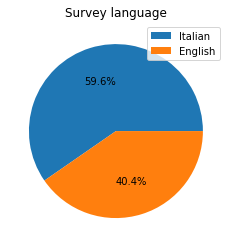

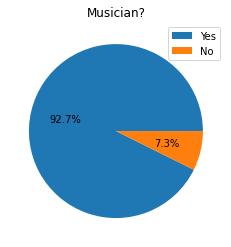

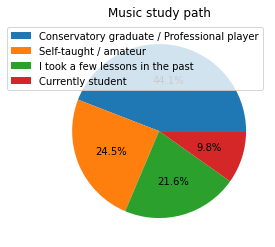

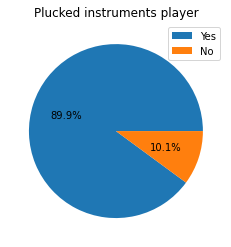